In [9]:
#Sales Forecast Prediction - Python Project by Khayelihle Ngcebo Mfeka

# Sales forecasting is an important aspect of business planning, helping organizations predict future sales
# and make informed decisions about inventory management, marketing strategies and resource allocation.

#In this project, I will explore how to build a sales forecast prediction model using Python.
#Sales forecasting involves estimating current or future sales based on data trends.

#Below is the step-by-step implementation of the sales prediction model.


In [22]:
#Step 1 : Install all required libraries (pandas numpy matplotlib seaborn scikit-learn xgboost)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

In [11]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [12]:
import xgboost as xgb

In [13]:
#Step 2 : Load dataset (csv sales data file sales dataset that contains features like Row ID, Order ID, Customer ID, Customer ID, etc.)
data = pd.read_csv(r"C:\Users\khayo\OneDrive\Desktop\Training Material\Python\Datasets\Sales_Data.csv")

In [14]:
#View my first 5 rows to screen through the structure of the data
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


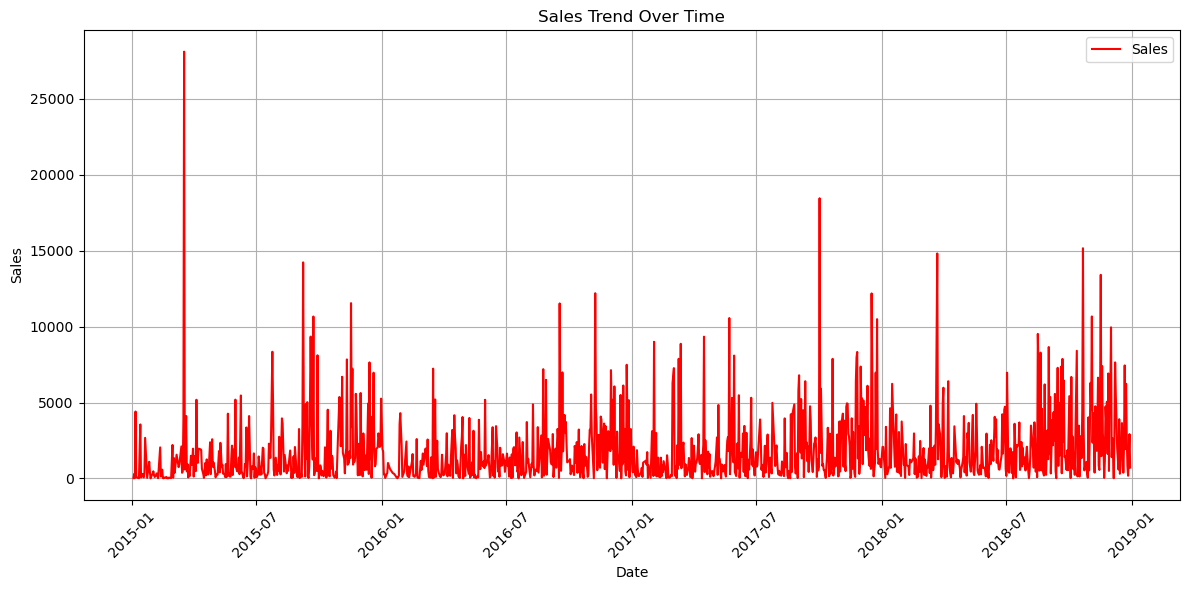

In [15]:
# Step 3 : Data Preprocessing and Visualization
# I will preprocess the data and visualize the sales trend over time
#pd.to_datetime: Converts the "Order Date" column into datetime format allowing us to perform time-based operations.
#groupby: Groups the data by "Order Date" and sums the sales for each date, creating a time series of daily sales.

data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d/%m/%Y')

sales_by_date = data.groupby('Order Date')['Sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(sales_by_date['Order Date'], sales_by_date['Sales'], label='Sales', color='red')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
# Step 4 : Feature Engineering - Creating Lagged Features
#I will create lagged features to capture the temporal patterns in the sales data.

#create_lagged_features: This function generates lagged features by shifting the sales data by a given number of time steps like 1, 2, 3, etc.
#Lag features help the model learn from the previous sales data to predict future sales.
#dropna: Drops rows with missing values which are introduced due to the shift operation when lagging.

def create_lagged_features(data, lag=1):
    lagged_data = data.copy()
    for i in range(1, lag+1):
        lagged_data[f'lag_{i}'] = lagged_data['Sales'].shift(i)
    return lagged_data

lag = 5  
sales_with_lags = create_lagged_features(data[['Order Date', 'Sales']], lag)

sales_with_lags = sales_with_lags.dropna()


In [17]:
#Step 5 : Preparing the Data for Training
#In this step I prepare the data for training and testing.

#drop(columns): Removes the 'Order Date' and 'Sales' columns from the feature set X since they are not needed for training as sales is the target variable.
#train_test_split: Splits the dataset into training (80%) and testing (20%) sets.
#shuffle=False: ensures that the data is split in chronological order preserving the time series structure.

X = sales_with_lags.drop(columns=['Order Date', 'Sales'])
y = sales_with_lags['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [18]:
#Step 6 : Training the XGBoost Model
#I will train the XGBoost model. 
#It is a machine learning algorithm that uses gradient boosting to create highly accurate predictive models
#particularly well-suited for regression tasks like sales forecasting.

#XGBRegressor: Initializes an XGBoost model for regression tasks.
#objective='reg:squarederror': indicates that we are solving a regression problem i.e predicting continuous sales values.
#learning_rate (lr): Controls the step size at each iteration while moving toward a minimum of the loss function with smaller values leading to slower convergence.
#n_estimators: The number of boosting rounds or trees to build with higher values improving model accuracy but potentially leading to overfitting.
#max_depth: Defines the maximum depth of each decision tree controlling the complexity of the model. Deeper trees can model more complex patterns.
#fit: Trains the model on the training data (X_train, y_train

model_xgb = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5)
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [23]:

#Step 7 : Making Predictions and Evaluating the Model
#I will make predictions and evaluate the model performance using RMSE.

#predict: Makes predictions on the test set (X_test) using the trained XGBoost model.
#mean_squared_error: Computes the Mean Squared Error (MSE) between actual and predicted values.
#We use np.sqrt to compute the Root Mean Squared Error (RMSE), which is a standard metric for evaluating regression models.

predictions_xgb = model_xgb.predict(X_test)
rmse_xgb = np.sqrt(mean_squared_error(y_test, predictions_xgb))

print(f"RMSE: {rmse_xgb:.2f}")

RMSE: 734.63


In [ ]:
#The RMSE of 734.63 indicates the average deviation between the actual and predicted sales values.
#A lower RMSE value signifies better model accuracy, with the model's predictions being closer to the actual sales data.
#As we have large amount of sales data this RMSE score is accptable.



In [ ]:
#Step 8 : Visualizing Results
#I will plot both the actual and predicted sales to visually compare the performance of the model.

plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Sales', color='red')
plt.plot(y_test.index, predictions_xgb, label='Predicted Sales', color='green')
plt.title('Sales Forecasting using XGBoost')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#As we can see the predicted and actual values are quite close to each other this proves the efficiency of our model. 
#Sales forecasting using machine learning models like XGBoost can significantly enhance the accuracy of predictions by capturing temporal patterns in historical data. 
#It can be used for improving sales predictions helping businesses optimize inventory, pricing and demand planning.